In [1]:
import pandas as pd
import numpy as np
import random

from IPython.display import display, Image
from pigeon import annotate

from collections import defaultdict
from pathlib import Path
from typing import List
from matplotlib import pyplot as plt

In [2]:
%load_ext autoreload
%autoreload 2

In [4]:
ROOT: Path = Path("../")
DATA: Path = ROOT / "data"
VISUAL_GENOME: Path = DATA / "visual_genome"
IMAGES: Path = VISUAL_GENOME / "images" / "VG_100K"
RESULTS: Path = ROOT / "results"

SEED: int = 4567

In [16]:
np.random.seed(SEED)
random.seed(SEED)

In [60]:
df = pd.read_csv(VISUAL_GENOME / "processed" / "people_data.csv")
df = df[df.contains_person == 1]
df.head()

,image_id,is_corrupted,contains_person,used_people_detector,is_sport_hf_vqa,is_sport_hf_vqa_conf
0,1,0,1,0,0,0.997345
1,2,0,1,0,0,0.988688
2,3,0,1,0,0,0.984434
6,7,0,1,0,0,0.987285
7,8,0,1,0,0,0.973007


## Sport-related images

In [18]:
sample = df.sample(1000)

Selects images that depict people doing sport or sport-related activities.

In [ ]:
images = [IMAGES / f"{image_id}.jpg" for image_id in sample.image_id]

annotations_ = annotate(
    images,
    options=["Sport", "Not Sport"],
    display_fn=lambda filename: display(Image(filename))
)



HTML(value='0 examples annotated, 1001 examples left')

Output()

In [30]:
sample["is_sport_manual_label"] = [1 if a[1] == "Sport" else 0 for a in annotations]

In [33]:
sample.head()

,image_id,is_corrupted,contains_person,used_people_detector,is_sport_manual_label
97724,2320642,0,1,1,0
63261,2356706,0,1,0,0
37469,2383721,0,1,0,1
76906,2342419,0,1,0,0
80274,2338896,0,1,1,0


In [ ]:
sample.to_csv(RESULTS / "people_data_manual_labels_sports.csv", index=False)

In [7]:
labelled = pd.read_csv(RESULTS / "people_data_manual_labels_sports.csv")

labelled[labelled.is_sport_manual_label == 1].sample(10)

,image_id,is_corrupted,contains_person,used_people_detector,is_sport_manual_label
216,2324872,0,1,0,1
976,2326936,0,1,0,1
597,2365715,0,1,0,1
652,1592843,0,1,0,1
942,2363833,0,1,0,1
139,2406727,0,1,0,1
834,2362040,0,1,1,1
88,2384264,0,1,1,1
365,2413203,0,1,0,1
357,2386487,0,1,0,1


### Work-related images

In [136]:
SEED: int = 1288
np.random.seed(SEED)
random.seed(SEED)

sample = df.sample(1000)

Select images of work-related activities, such as people in an office, people working on a computer, people in a meeting, people in a factory, people in a construction site, etc.

Note that we consider work-related only images depicting workers as primary subjects. For instance, in a traffic scene, a truck driver in the background would not configure the image as work-related. On the contrary, an image depicting a barman serving a customer would be considered work-related if the worker is part of the main subject of the image.

In [ ]:
images = [IMAGES / f"{image_id}.jpg" for image_id in sample.image_id]

def display_image(filename: Path):
    print(filename)
    display(Image(filename))

annotations = annotate(
    images,
    options=["Work", "Not Work"],
    display_fn=display_image
)

HTML(value='0 examples annotated, 1001 examples left')

Output()

../data/visual_genome/images/VG_100K/2403348.jpg


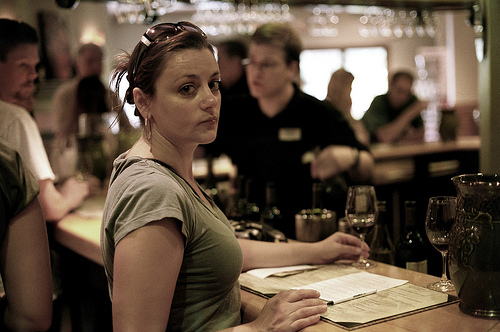

((PosixPath('../data/visual_genome/images/VG_100K/2403348.jpg'), 'Not Work'),
 'Work')

In [160]:
display_image(images[634])
annotations[634] = (annotations[634][0], "Work")
annotations[634]

In [161]:
sample["is_work_manual_label"] = [1 if a[1] == "Work" else 0 for a in annotations]
sample.head()

,image_id,is_corrupted,contains_person,used_people_detector,is_sport_hf_vqa,is_sport_hf_vqa_conf,is_sport_blip,is_work_manual_label
99188,2319112,0,1,0,0,0.998650,0,0
36157,2385092,0,1,0,1,0.785676,0,0
15401,2406801,0,1,0,1,0.999181,1,0
79763,2339423,0,1,0,0,0.982066,0,0
95978,2322462,0,1,1,0,0.960040,0,0


In [162]:
sample.to_csv(RESULTS / "people_data_manual_labels_work.csv", index=False)

In [9]:
labelled = pd.read_csv(RESULTS / "people_data_manual_labels_work.csv")

labelled[labelled.is_work_manual_label == 1].sample(10)

,image_id,is_corrupted,contains_person,used_people_detector,is_sport_hf_vqa,is_sport_hf_vqa_conf,is_sport_blip,is_work_manual_label
541,2359263,0,1,0,0,0.767048,0,1
477,2317550,0,1,0,0,0.744679,0,1
948,2367196,0,1,0,0,0.957378,0,1
730,2417212,0,1,0,0,0.999515,0,1
333,2406076,0,1,0,0,0.992667,0,1
49,410,0,1,0,0,0.989199,0,1
503,2397913,0,1,0,0,0.996834,0,1
852,2416106,0,1,0,0,0.762767,0,1
12,2378327,0,1,1,0,0.996731,0,1
115,2384822,0,1,0,0,0.985553,0,1
